# Project 3

This project asks you to perform various experiments with regression. The dataset we are using is taken from a real estate dataset (also used in HW2).

You will write code and discussion texts into code and text cells in this notebook. 

If a block starts with TODO:, this means that you need to write something there. 

Some code had been written for you to guide the project. Don't change the already written code.

## Grading
Each subproblem is worth 1 pt. 

In [281]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import time

## Setup for the first part of the homework

For problems P1 to P6 we are using a simple dataset where we extract one 
explanatory variable ``sq_mt_built`` to predict the price of the house ``buy_price``

The lenght 21742
The columns of the database Index(['Unnamed: 0', 'id', 'title', 'subtitle', 'sq_mt_built', 'sq_mt_useful',
       'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude',
       'longitude', 'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',


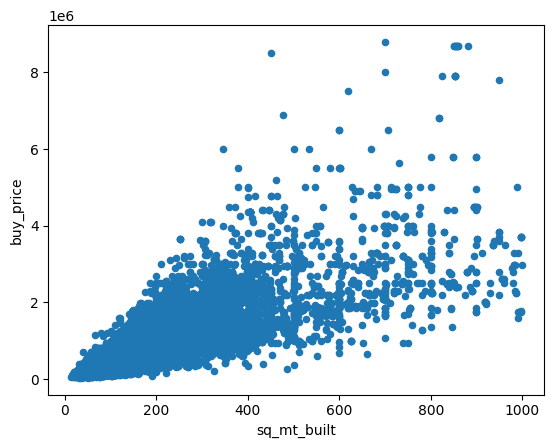

In [282]:
df = pd.read_csv("houses_Madrid.csv")
print(f"The lenght {len(df.index)}")
print(f"The columns of the database {df.columns}")
df[["sq_mt_built", "buy_price"]].plot.scatter(x="sq_mt_built", y="buy_price")
## FIXME: add here the creation of the training data and test data

df_shuffled = df.sample(frac=1) # shuffle the rows

In [283]:
x = df_shuffled["sq_mt_built"].to_numpy(dtype=np.float64)
y = df_shuffled["buy_price"].to_numpy(dtype=np.float64)
training_data_x = x[:16000]
training_data_y = y[:16000]
test_data_x = x[16000:]
test_data_y = y[16000:]
training_data_x = np.nan_to_num(training_data_x, nan=0)
training_data_y = np.nan_to_num(training_data_y, nan=0)
test_data_x = np.nan_to_num(test_data_x, nan=0)
test_data_y = np.nan_to_num(test_data_y, nan=0)

In [284]:
training_data_y

array([ 245000.,  485000.,  159000., ...,  159900.,  540000., 1350000.])

## P1: Loss function
Implement a root-mean-square error (RMSE) loss function between the prediction $\hat{y}$ and $y$ value using Python operations. Run some experiments to validate that this works as expected. 
Then, look up the same in the sklearn library
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
and implement it based on what is there. 

In [285]:

# TODO: implement the loss function here using Python math ops and sklearn
def loss_RMSE(y, yhat):
    
    #square the difference
    squared_errors = (y - yhat) ** 2
    #Take the mean of the squared errors
    mean_squared_error = np.mean(squared_errors)
    #Then take the square root
    rmse_value = np.sqrt(mean_squared_error)
    
    return rmse_value

def loss_RMSE_sk(y, yhat):
    
    #Use scikit MSE function on y and yhat
    mse = sk.metrics.mean_squared_error(y, yhat)
    #Squarerrot the result
    rmse_val = np.sqrt(mse)
    
    return rmse_val

In [286]:
# TODO: Now, run some experiments with your function, with the one taken with sklearn 
# Compare their outputs.

y = np.array([3.0, 4.0, 5.0, 6.0, 7.0]) 
yhat = np.array([2.8, 3.9, 5.2, 6.4, 6.8])  

pyFunc = loss_RMSE(y, yhat)
sciFunc = loss_RMSE_sk(y, yhat)

if pyFunc == sciFunc:
    print("Equal")


Equal


## P2: Implement a linear predictor
Implement a function of type ``predict(x, theta) --> y_hat`` which implements a linear model of the type $\hat{y} = \theta_1 \cdot x + \theta_0$

In [287]:
# TODO: implement the predictor function here
def predict(x, theta):
    
    y_hat = 0
    
    #Define thetas
    theta0, theta1 = theta
    
    #calculate yhat
    y_hat = theta1 * x + theta0
    
    
    return y_hat

In [288]:
# TODO: now, run some experiments with it
theta = (3.5, 3.0)
result = predict(4, theta)
print(result)

15.5


## P3: Grid search
Implement a function ``grid_search()`` which returns an estimate of the best $\theta$ by trying out all the combinations of possibilities on a grid and returning the values that give you the most values. 
gridx and gridy define the range of numbers that we want to explore. For instance, grid0 might be [0, 0.25, 0.5, 0.75, 1.0] 

In [289]:
# TODO: implement the grid search function here 
def grid_search(training_data_x, training_data_y, grid0, grid1):
    #MSE has to start off high so we dont end up returning our default values
    best_theta =(0.0, 0.0)
    best_mse = 1000000000000000
    y_hat = 0
    #Nested for loop to claculate with different indexes of thetas withhin grid
    for theta0 in gridx:
        for theta1 in gridy:
            theta = (theta0, theta1)
            
            #Predict function rreturns yhat
            y_hat = theta1 * training_data_x + theta0
          
            #Calculate MSE
            mse = (y_hat - training_data_y)** 2
            arr_cleaned = np.nan_to_num(mse, nan=0)
            mse = np.mean(arr_cleaned)
            
            # Keep checking if mse is better than best_mse
            if mse < best_mse:
                best_mse = mse
                best_theta = theta
                
    return best_theta, best_mse

In [290]:
# TODO: run some experiments with grid_search
# Define some grid values. Train it on the data set. Test it on the test set. 
# Print the loss on the data set and the test set. Measure and print how long the training takes.
#First set of grids
grid0 = [0, 0.25, 0.5, 0.75, 1.0]
grid1 = [0.05, 0.2, 0.4, 0.6, 0.8]

startTime = time.time()
#Return better of thetas and better of mse
best_theta, best_mse = grid_search(training_data_x, training_data_y, grid0, grid1)

endTime = time.time() - startTime

#Train yhat and mse
y_hat_train = best_theta[1] * training_data_x + best_theta[0]

train_mse = np.mean((y_hat_train - training_data_y) ** 2)


#test yhat and mse
y_hat_test = best_theta[1] * test_data_x + best_theta[0]
test_mse = np.mean((y_hat_test - test_data_y) ** 2)


print("Best Theta:", best_theta)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
print("Training Time (seconds):", endTime)

Best Theta: (1.0, 1.0)
Training MSE: 1051796589418.544
Test MSE: 1001988335106.7417
Training Time (seconds): 0.0032618045806884766


In [291]:
# TODO: repeat the experimentation from above with different grids. 
# Finally, print the grid that provides the best value while still running faster 
# than 10 seconds.
#Second set of grids
grid3 = [0, 0.5, 0.1, 1.5, 2.0]
grid4 = [.15, .3, .45, .6, .75]

startTimeNew = time.time()
#Return better of thetas and better of mse
best_theta_new, best_mse_new = grid_search(training_data_x, training_data_y, grid3, grid4)

endTimeNew = time.time() - startTimeNew

#Train yhat and mse
y_hat_train_new = best_theta_new[1] * training_data_x + best_theta_new[0]

train_mse_new = np.mean((y_hat_train_new - training_data_y) ** 2)


#test yhat and mse
y_hat_test_new = best_theta_new[1] * test_data_x + best_theta_new[0]
test_mse_new = np.mean((y_hat_test_new - test_data_y) ** 2)


print("Best Theta:", best_theta_new)
print("Training MSE:", train_mse_new)
print("Test MSE:", test_mse_new)
print("Training Time (seconds):", endTimeNew)
print("The grids seem to have the same effect")




Best Theta: (1.0, 1.0)
Training MSE: 1051796589418.544
Test MSE: 1001988335106.7417
Training Time (seconds): 0.005997180938720703
The grids seem to have the same effect


## P4: Random search
Implement a function that returns the estimate for the best $\theta$ by trying out random 
$\theta=[\theta_0, \theta_1]$ values, and returning the one that minimizes the error on the training set passed to it. The number of tries is described in the ``trials`` parameter.

In [292]:
# TODO: implement the random search function here 
def random_search(training_data_x, training_data_y, trials):
    best_theta = None
    best_mse = float('inf')  # Initialize with a high value

    for _ in range(trials):
        # Generate random values for theta0 and theta1
        theta0 = np.random.rand()  # Random value between 0 and 1
        theta1 = np.random.rand()  # Random value between 0 and 1
        
        # Calculate y_hat using the current random theta
        y_hat = theta1 * training_data_x + theta0
        
        # Calculate Mean Squared Error (MSE)
        mse = np.mean((y_hat - training_data_y) ** 2)
        
        # Check if the current MSE is better than the best found so far
        if mse < best_mse:
            best_mse = mse
            best_theta = (theta0, theta1)
    
    return best_theta
    return theta

In [293]:
# TODO: run some experiments with random_search
# Choose some value for trial. Train it on the data set. Test it on the test set. 
# Print the loss on the data set and the test set. Measure and print how long the training takes.

trials = 10000

#Starts to measure time
start_time = time.time()

#Call random search function
best_theta = random_search(training_data_x, training_data_y, trials)

# Calculate training time
training_time = time.time() - start_time


#calculate y_hat for training data using the best_theta
y_hat_train = best_theta[1] * training_data_x + best_theta[0]

#Calculate Mean Squared Error (MSE) on training data
train_mse = np.mean((y_hat_train - training_data_y) ** 2)

#Calculate y_hat for test data using the best_theta
y_hat_test = best_theta[1] * test_data_x + best_theta[0]

#Calculate Mean Squared Error (MSE) on test data
test_mse = np.mean((y_hat_test - test_data_y) ** 2)

#print
print("Best Theta:", best_theta)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
print("Training Time (seconds):", training_time)

Best Theta: (0.9330541523238092, 0.9998650312972089)
Training MSE: 1051796724896.0112
Test MSE: 1001988468240.1989
Training Time (seconds): 0.3262364864349365


## P5: Improvements
Propose an improvement to the algorithms you have implemented for 4 and 5 and show that with your improvement, the performance is better than the original. Some examples of what you might try:
* Choose values for $\theta_0$ and $\theta_1$ on a non-uniform grid
* First find one of them, and fix it, and then refine on the other one
* For random: sample according to a non-uniform distribution
* First use a low resolution search to find the approximate values of  $\theta_0$ and $\theta_1$, then search for a more precise value

In [294]:
# TODO: implement your improvements here

# Grid Refinement Search
def grid_refinement_search(training_data_x, training_data_y, gridx_coarse, gridy_coarse, gridx_fine, gridy_fine):
    # Coarse Grid Search
    best_theta_coarse, _ = grid_search(training_data_x, training_data_y, gridx_coarse, gridy_coarse)

    # Fine Grid Search (around best_theta_coarse)
    best_theta_fine, best_mse = grid_search_uniform(training_data_x, training_data_y, gridx_fine, gridy_fine)

    return best_theta_fine, best_mse


#The sequential search function is an improvement than randomly grabbing values for theta
def sequential_search(training_data_x, training_data_y, trials, initial_sampling_range, refinement_range):
    best_theta = None
    best_mse = float('inf')  # Initialize with a high value

    for _ in range(trials):
        # Initial Random Sampling
        theta0 = np.random.uniform(*initial_sampling_range)
        theta1 = np.random.uniform(*initial_sampling_range)

        y_hat = theta1 * training_data_x + theta0
        mse = np.mean((y_hat - training_data_y) ** 2)

        if mse < best_mse:
            best_mse = mse
            best_theta = (theta0, theta1)

        # Sequential Refinement
        new_theta0 = np.random.uniform(
            best_theta[0] - refinement_range[0],
            best_theta[0] + refinement_range[0]
        )
        new_theta1 = np.random.uniform(
            best_theta[1] - refinement_range[1],
            best_theta[1] + refinement_range[1]
        )

        y_hat = new_theta1 * training_data_x + new_theta0
        mse = np.mean((y_hat - training_data_y) ** 2)

        if mse < best_mse:
            best_mse = mse
            best_theta = (new_theta0, new_theta1)

    return best_theta, best_mse


TODO: Describe in one paragraph the conclusions you have drawn from your improvement experiments

By using a coarse grid for exploring and a fine grid for refinement gets the besty of both worlds when it comes to grid search. The fine grid avoids missing important regions, while the coarse grid is less computationally expensive. I learned some of these techniques through TensorFlow tutorials online. I learned in class that random search is not very practical, so sequential search fixes that problem. Using sequential search allows for more efficiency in searching because it uses its previous exploring to learn where to narrow its search. If I am not mistaken this is reffered to as refining. Since sequential search adapts to its previous searches, it makes it way more practical than just random searches.

## P6: Using the sklearn library for linear regression

Use ``sklearn.linear_model.LinearRegression`` to solve the same problem you previously solved using the grid search and random search.

Compare the returned values with what you have achieved. Compare the parameters that had been found to the parameters you have found. Compare the speed. 

In [299]:
# TODO: Implement here

model = LinearRegression()

# Measure the training time
start_time = time.time()

# Fit the model to the training data
model.fit(training_data_x.reshape(-1, 1), training_data_y)

# Calculate the coefficients
theta0 = model.intercept_
theta1 = model.coef_[0]

# Calculate the training time
training_time_new = time.time() - start_time

# Print the results
print("Linear Regression Results:")
print("Best Theta (𝜃0):", theta0)
print("Best Theta (𝜃1):", theta1)
print("Training Time (seconds):", training_time_new)
print("These betas seem very far off")

Linear Regression Results:
Best Theta (𝜃0): 6457.105439210311
Best Theta (𝜃1): 4438.226060709907
Training Time (seconds): 0.0026988983154296875
These betas seem very far off


In [302]:

print("Linear Regression Results:")
print("Best Theta (𝜃0):", theta0)
print("Best Theta (𝜃1):", theta1)
print("Training Time (seconds):", training_time_new)
print("\n\n\n")

print("Grid Search Results:")
print("Best Theta:", best_theta_new)
print("Training MSE:", train_mse_new)
print("Test MSE:", test_mse_new)
print("Training Time (seconds):", endTimeNew)
print("\n\n\n")

print("Random Search Results:")
print("Best Theta:", best_theta)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
print("Training Time (seconds):", training_time)



Linear Regression Results:
Best Theta (𝜃0): 6457.105439210311
Best Theta (𝜃1): 4438.226060709907
Training Time (seconds): 0.0026988983154296875




Grid Search Results:
Best Theta: (1.0, 1.0)
Training MSE: 1051796589418.544
Test MSE: 1001988335106.7417
Training Time (seconds): 0.005997180938720703




Random Search Results:
Best Theta: (0.9330541523238092, 0.9998650312972089)
Training MSE: 1051796724896.0112
Test MSE: 1001988468240.1989
Training Time (seconds): 0.0019979476928710938


TODO: discuss the performance of the sklearn library implementation, compared to what you implemented.

It seemed to run faster than my grid search, but not my random search. Also it seems to have a lot more precise values as well. I am assuming because it is not basing it off some grid that I provided. It also is most likely doing math/code more correctly than my example.

# Setup for the second part of the project
For the questions P7-P10 we use linear regression on a multivariate setting. This time, there are 7 explanatory variables: ``sq_mt_built``, ``n_rooms``, ``n_bathrooms``, ``is_renewal_needed``, ``is_new_development`` and ``has_fitted_wardrobes``. 

We will first create the training and test data while doing some minimal data cleaning.

In [313]:
# replacing the NA values with some sensible defaults
# the way I was investigating these is by printing 
#    df["has_individual_heeating"].value_counts(dropna=False) etc
df_shuffled["has_individual_heating"] = df_shuffled["has_individual_heating"].fillna(False)
df_shuffled["n_bathrooms"] = df_shuffled["n_bathrooms"].fillna(1)
df_shuffled["has_individual_heating"] = df_shuffled["has_individual_heating"].fillna(False)
df_shuffled["is_new_development"] = df_shuffled["is_new_development"].fillna(False)
df_shuffled["has_fitted_wardrobes"] = df_shuffled["has_fitted_wardrobes"].fillna(False)

xfields = ["sq_mt_built", "n_rooms", "n_bathrooms", "has_individual_heating", \
           "is_renewal_needed", "is_new_development", "has_fitted_wardrobes"]

x = df_shuffled[xfields].to_numpy(dtype=np.float64)
y = df_shuffled["buy_price"].to_numpy(dtype=np.float64)
training_data_x = x[:16000]
training_data_y = y[:16000]
test_data_x = x[16000:]
test_data_y = y[16000:]
training_data_x = np.nan_to_num(training_data_x, nan=0)
training_data_y = np.nan_to_num(training_data_y, nan=0)
test_data_x = np.nan_to_num(test_data_x, nan=0)
test_data_y = np.nan_to_num(test_data_y, nan=0)



## P7: Grid search for multiple variables
Implement the linear predictor model for multiple variables. Note that this time ``x`` will be an array of 7 values, and ``theta`` will be an array of 8 values. 

Then, implement a grid search function (similar to P3) but this time for the 7 explanatory variables. Pass the grids as an array into the grid variable. 

In [328]:
# TODO: implement the predictor function here
def predict_multi(x, theta):
    # Ensure that x and theta have compatible shapes
    assert len(x) == len(theta) - 1, "Mismatch in input dimensions"
    
    # Initialize the predicted value
    y_hat = theta[0]  # Initialize with theta0
    
    # Compute the linear combination of input features and parameters
    for i in range(len(x)):
        y_hat += x[i] * theta[i + 1]  # Add theta1, theta2, ..., theta7 * x1, x2, ..., x7
    
    return y_hat

# TODO: implement the grid search function here 
def grid_search(training_data_x, training_data_y, grids):
    best_theta = (0.0, 0.0)
    best_mse = 10000000
    
    for theta in grids:
        # Calculate predictions for the given theta
        y_hat = np.dot(training_data_x, theta) + theta[0]
        
        # Calculate mean squared error (MSE)
        mse = np.mean((y_hat - training_data_y) ** 2)
        
        if mse < best_mse:
            best_mse = mse
            best_theta = theta
    
    return best_theta

In [330]:
# TODO: run experiments with your implementation for the grid search 

grid_sq_mt_built = [0, 0.25, 0.5, 0.75, 1.0]
grid_n_rooms = [0, 1, 2, 3, 4, 5]
grid_n_bathrooms = [1, 2, 3, 4]
grid_has_individual_heating = [False, True]
grid_is_renewal_needed = [False, True]
grid_is_new_development = [False, True]
grid_has_fitted_wardrobes = [False, True]

# Create a grid of all combinations
grids = np.array(np.meshgrid(
    grid_sq_mt_built,
    grid_n_rooms,
    grid_n_bathrooms,
    grid_has_individual_heating,
    grid_is_renewal_needed,
    grid_is_new_development,
    grid_has_fitted_wardrobes
)).T.reshape(-1, 7)




# TODO: Run grid search
best_theta = grid_search(training_data_x, training_data_y, grids)

# TODO: Print and analyze the best_theta values
print("Best Theta:", best_theta)


Best Theta: [0. 0. 1. 0. 0. 0. 0.]


TODO: describe here your experiences with implementing this problem, conclusions you draw. 

This was very difficult for me to try and figure out, and it still seems that my theta is not giving an acuurate answer, but if this was correct it seems that the lower theta value was what wokred best. It seems that the setup was similar to the linear variable grid search, but with a lot more default grids that you had to define.

## P8: Random search for multiple variables
Implement the random search technique for the multiple variables. 

In [336]:
# TODO: implement the random seeach function here 
def random_search(training_data_x, training_data_y, trials):
    num_features = training_data_x.shape[1]
    best_theta = None
    best_mse = float('inf')
    
    for _ in range(trials):
        # Generate random values for theta, including theta0 (intercept)
        theta = np.random.rand(num_features + 1)
        
        # Calculate predictions for the given theta
        y_hat = np.dot(np.insert(training_data_x, 0, 1, axis=1), theta)
        
        # Calculate mean squared error (MSE)
        mse = np.mean((y_hat - training_data_y) ** 2)
        
        if mse < best_mse:
            best_mse = mse
            best_theta = theta
    
    return best_theta

In [337]:
# TODO: run experiments with your implementation for the

trials = 1000  # Adjust the number of trials as needed
best_theta_random = random_search(training_data_x, training_data_y, trials)
    
print("Best Theta (Random Search):", best_theta_random)

Best Theta (Random Search): [0.11533523 0.01463158 0.19802332 0.08499546 0.66987136 0.21362313
 0.37044008 0.04742508]


TODO: describe here your experiments with the implementation for the random search
These thetas seem to be more accurate then in the multivariable grid search function I made, but this was also very similar to the linear variable random search function.

## P9: Use sklearn for linear regression in multiple variables
Use ``sklearn.linear_model.LinearRegression`` to solve the same problem you previously solved using the grid search and random search.

Compare the returned values with what you have achieved. Compare the parameters that had been found to the parameters you have found. Compare the speed.

In [338]:
# TODO: implement here
lr_model = LinearRegression()

# Measure the time taken by scikit-learn Linear Regression
start_time = time.time()
lr_model.fit(training_data_x, training_data_y)
end_time = time.time()
sklearn_training_time = end_time - start_time

# Get the coefficients and intercept from scikit-learn
sklearn_intercept = lr_model.intercept_
sklearn_coeffs = lr_model.coef_

# Make predictions using scikit-learn Linear Regression
sklearn_predictions = lr_model.predict(training_data_x)

# Calculate the mean squared error (MSE) using scikit-learn predictions
sklearn_mse = mean_squared_error(training_data_y, sklearn_predictions)

In [341]:
# TODO: run experiments here. 
print("Results using scikit-learn Linear Regression:")
print("Intercept:", sklearn_intercept)
print("Coefficients:", sklearn_coeffs)
print("MSE:", sklearn_mse)
print("Training Time (seconds):", sklearn_training_time)
print("\n\n\n")

print("Best Theta (Random Search):", best_theta_random)
print("\n\n\n")

print("Best Theta (Grid Search):", best_theta)

Results using scikit-learn Linear Regression:
Intercept: 0.5010010032240935
Coefficients: [-0.0066305  -0.00671772  0.00415149 -0.00758284  0.00078993  0.01364566
 -0.00152687]
MSE: 0.0826230106136189
Training Time (seconds): 0.0029997825622558594




Best Theta (Random Search): [0.11533523 0.01463158 0.19802332 0.08499546 0.66987136 0.21362313
 0.37044008 0.04742508]




Best Theta (Grid Search): [0.38341371 0.10560211 0.13492359 0.0733981  0.09626863 0.41513197
 0.04334944 0.06816971]


TODO: describe in one paragraph your experiences with implementing the multiple variable linear regression. 

It was definetly more of a challenge and I had to try and learn exactly how to use all of the sklearn functions, but it started to make more sense as I went on. I watched a few youtube videos which really helped me get a better understanding of multiple variable linear regression, and helped me a lot with defining multiple base grids depeneding on paramaeters. Doing the linear variable regrewssion really helped when implementing multible variables.

TODO: describe in one paragraph your experiences with the data wrangling process.

This was my first time really having to wrangle data like this. I have learned a little bit about manipulating data in python before this class, but I have never used sklearn before. Most of the data seemed to be laid out for me before hand, but I did have to implement some data cleaning techniques in order for me to use the np.mean function for finding the mse. This is because it was giving NAN values due to NAN values within the data. The function np.nan_to_num helped a lot with fixing this error.

## P10: Explore other linear regression techniques

Explore the use of other models provided from the sklearn library for linear regression. 

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Try out two of them of your choice. Explain the results you obtained and compare them with other approaches. 

I played around with the linear_model.HuberRegressor function because it said it was robust to outliers. I thought this was interesting because I struggled with this when trying to manipulate the above data. This would have helped a lot if it could classify these outliers and not let it affect my numPy arrays. This would be extremely helpful when calculating MSE because I kepty haveing problems with np.mean giving nan errors. Taking away outliers, or in this case "not a number" values in the array.I also saw Ridge Regression which seemed to help prevent overfitting data.I am not sure how well this would apply to this example, but I still found the idea very interesting and wanted to see how it could apply, if at all. I seemed to struggle because I have never used it before, but I look forward to familarizing myself with it due to the importance of avoiding overfitting in machine learning.